<a href="https://colab.research.google.com/github/fipanaque/Data_visualization_with_R/blob/main/embd_mdes_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R session to process mdes questionnaire for Approach 2 (1 participant / 3 sessions)

1.   List item
2.   List item



## Import necessary libraries

In [ ]:
install.packages('tidyverse')
install.packages('ggplot2')

library('tidyverse')
library('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Load database

## Using the Data

In [ ]:
raw <- read_csv('/mdes_responses.csv')
head(raw)

Rows: 156 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): video_id, participant, session, positive_score, negative_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


video_id,participant,session,positive_score,negative_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007,1,1,0.100,0.575
1003,1,1,0.175,0.525
1009,1,1,0.050,0.500
1004,1,1,0.050,0.475
1005,1,1,0.150,0.450
1001,1,1,0.000,0.450


In [ ]:
ggplot(data, aes(valence, arousal, label=bytes, colour=label)) +
  scale_x_continuous(breaks = 1:9, limits = c(1, 9)) +
  scale_y_continuous(breaks = 1:9, limits = c(1, 9)) +
  coord_fixed() + theme_bw() +
  ggtitle("Scatter Plot of Valence vs Arousal") +
  xlab("Valence") + ylab("Arousal") +
  scale_colour_viridis_d() +
  geom_point() +
  geom_text(hjust =0, nudge_x = 0.05, check_overlap = FALSE) #this is to add a text next to the points in the plot

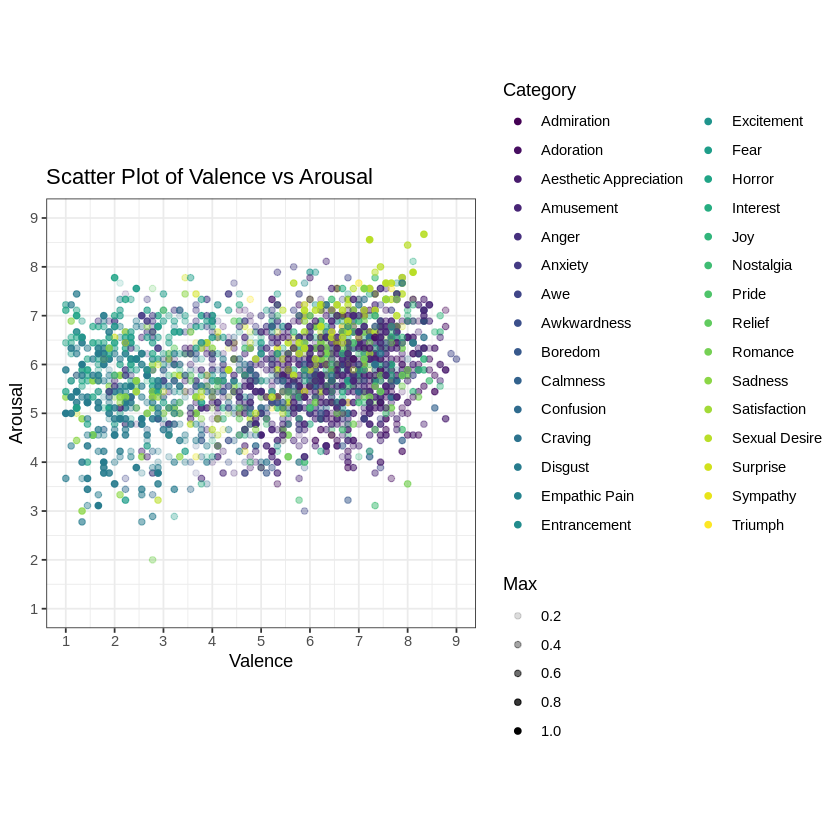

In [ ]:
ggplot(data, aes(valence, arousal, colour = Category, alpha = Max)) +
  scale_x_continuous(breaks = 1:9, limits = c(1, 9)) +
  scale_y_continuous(breaks = 1:9, limits = c(1, 9)) +
  coord_fixed() + theme_bw() +
  ggtitle("Scatter Plot of Valence vs Arousal") +
  xlab("Valence") + ylab("Arousal") +
  scale_colour_viridis_d() +
  geom_point()

### Using Filters

In [ ]:
data <- raw %>%
  select(c('participant', 'session', 'positive_score', 'negative_score', 'video_id')) %>%
  group_by(video_id, session) %>%
  summarise(positive_score = mean(positive_score), negative_score = mean(negative_score), n = n())
head (data)

`summarise()` has grouped output by 'video_id'. You can override using the
`.groups` argument.


video_id,session,positive_score,negative_score,n
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1000,1,0.325,0.225,1
1000,2,0.250,0.375,1
1000,3,0.200,0.300,1
1001,1,0.000,0.450,1
1001,2,0.050,0.550,1
1001,3,0.025,0.450,1


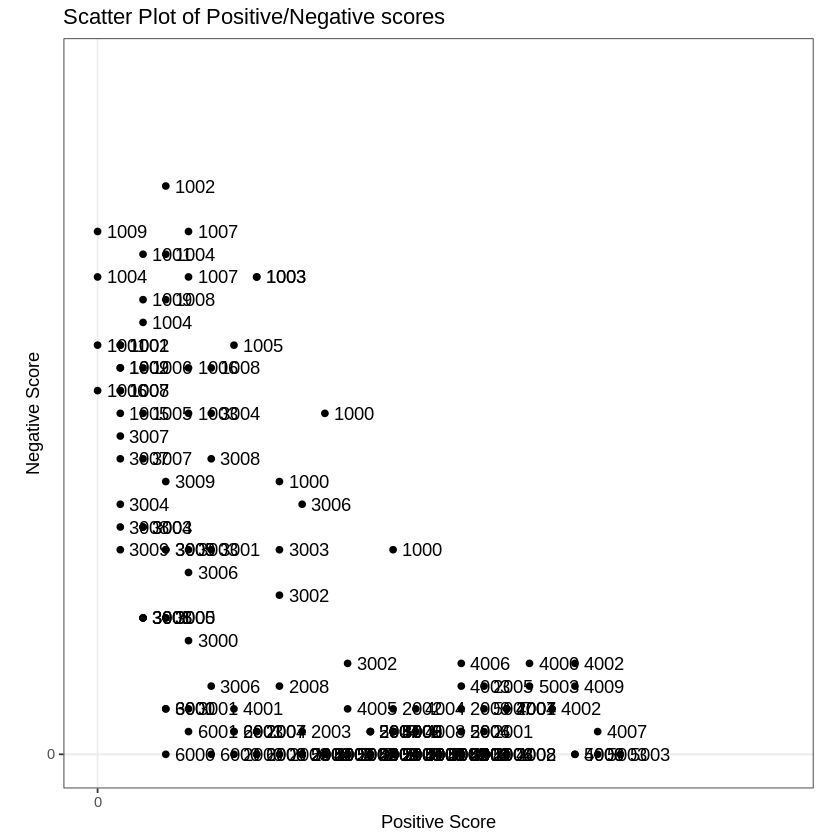

In [ ]:
ggplot(data, aes(positive_score, negative_score, label=video_id)) +
  scale_x_continuous(breaks = 0:75, limits = c(0, 0.75)) +
  scale_y_continuous(breaks = 0:75, limits = c(0, 0.75)) +
  coord_fixed() + theme_bw() +
  ggtitle("Scatter Plot of Positive/Negative scores") +
  xlab("Positive Score") + ylab("Negative Score") +
  scale_colour_viridis_c() +

  geom_point() +
  geom_text(hjust =0, nudge_x = 0.01, check_overlap = FALSE) #this is to add a text next to the points in the plot

### All the Data

In [ ]:
data1 <- raw %>%
  select(c('videoID', 'label','valence', 'arousal','participant')) %>%
  group_by(videoID, label) %>%
  summarise(valence_mean = mean(valence), v_sd = sd(valence), arousal_mean = mean(arousal), a_sd = sd(arousal), n = n())
  head(data1)

In [ ]:
ggplot(data1, aes(valence_mean, arousal_mean, label=videoID, colour=label)) +
  scale_x_continuous(breaks = 1:9, limits = c(1, 9)) +
  scale_y_continuous(breaks = 1:9, limits = c(1, 9)) +
  coord_fixed() + theme_bw() +
  ggtitle("Scatter Plot of Valence vs Arousal") +
  xlab("Valence") + ylab("Arousal") +
  scale_colour_viridis_d() +
  geom_point() +
  geom_text(hjust =0, nudge_x = 0.05, check_overlap = FALSE) #this is to add a text next to the points in the plot

In [ ]:
data2 <- raw %>%
  select(c('videoID', 'label','valence', 'arousal','participant')) %>%
  group_by(label, participant) %>%
  summarise(valence_mean = mean(valence), v_sd = sd(valence), arousal_mean = mean(arousal), a_sd = sd(arousal), n = n())
  head(data2)

In [ ]:
ggplot(data2, aes(valence_mean, arousal_mean, label=label)) +
  scale_x_continuous(breaks = 1:9, limits = c(1, 9)) +
  scale_y_continuous(breaks = 1:9, limits = c(1, 9)) +
  coord_fixed() + theme_bw() +
  ggtitle("Scatter Plot of Valence vs Arousal") +
  xlab("Valence") + ylab("Arousal") +
  scale_colour_viridis_d(option = "plasma") +
  geom_point() +
  geom_text(hjust =0, nudge_x = 0.05, check_overlap = FALSE) #this is to add a text next to the points in the plot